Customer Segmentation and Clustering

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12525 sha256=207cd6f31d709a293522dd01b2e6b909ff97f0791245edc7d35c64de8d73374f
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


UNIVARIATE ANALYSIS

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-9-5c9bfeb4bab1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

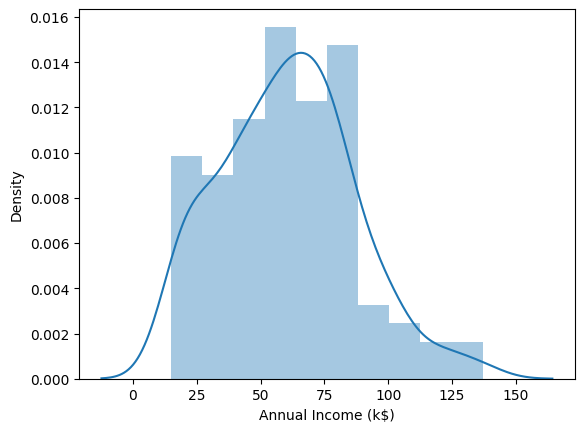

In [ ]:
sns.distplot(df['Annual Income (k$)'])

**displot** is newer version to **distplot** of seaborn.
To get kde line back as in distplot- pass code (kde=True) while doing sns.displot

*update benefit*-

You can see the distribution of 2 variables at the same time

Access to seaborn's faster grid ,i.e., you can split your data into category and build small multiples

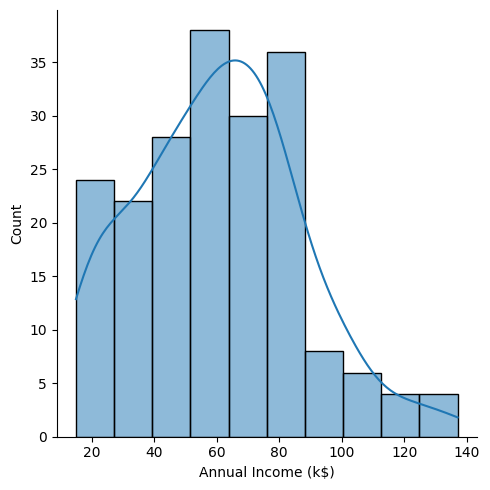

In [ ]:
sns.displot(df['Annual Income (k$)'],kde=True)

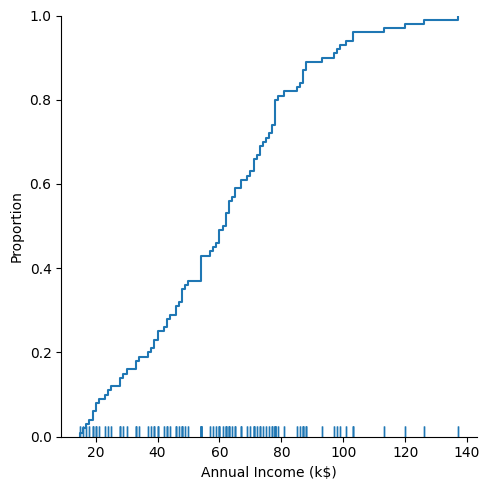

In [ ]:
sns.displot(df['Annual Income (k$)'],kind='ecdf',rug=True)

**ecdf** plot is empirical cumulative distribution function

fig shows ecdf replicates the cdf by adding up all of the different values as it moves accross the Annual Income variable wrt Proportion

**rugplot** tells where the data points are falling accross the x dimension

# MULTIVARIATE ANALYSIS

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

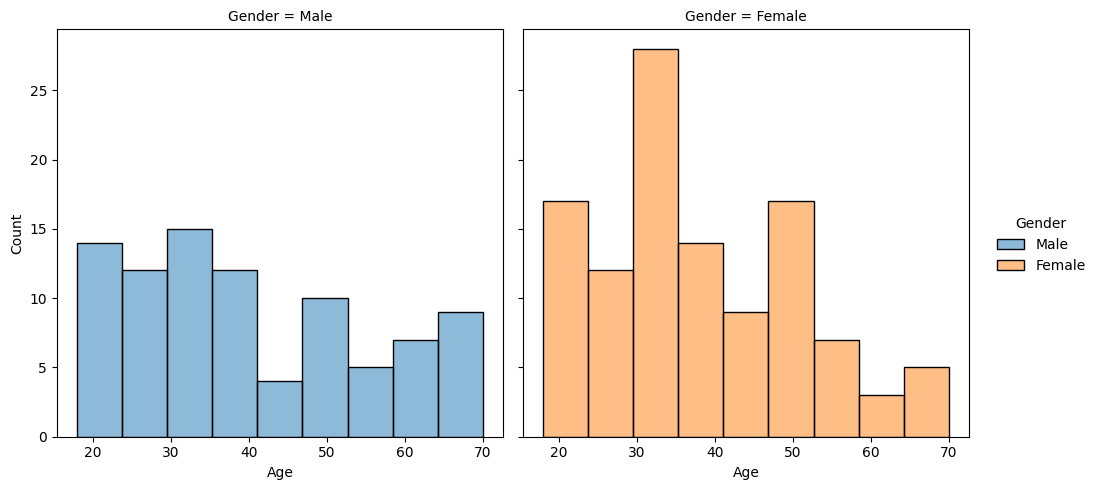

<Figure size 640x480 with 0 Axes>

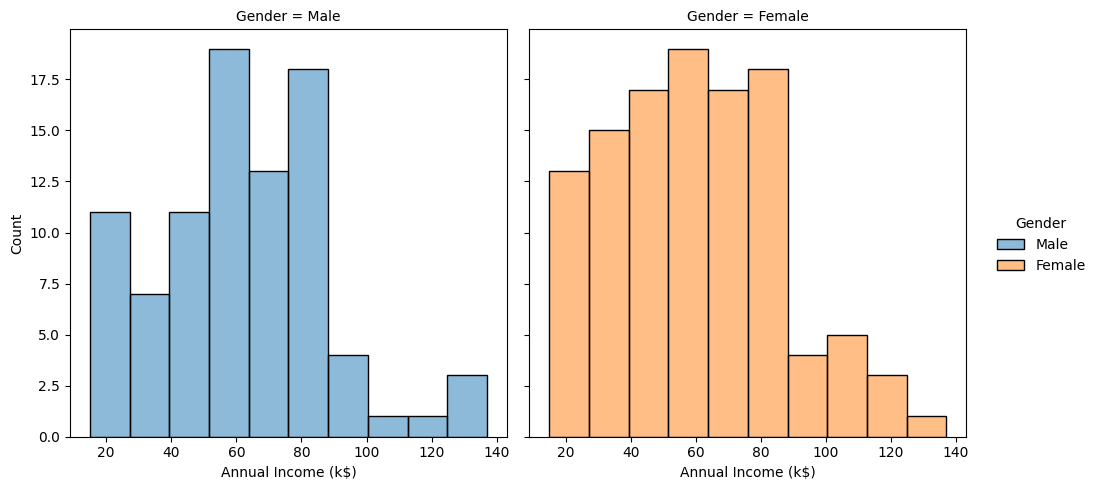

<Figure size 640x480 with 0 Axes>

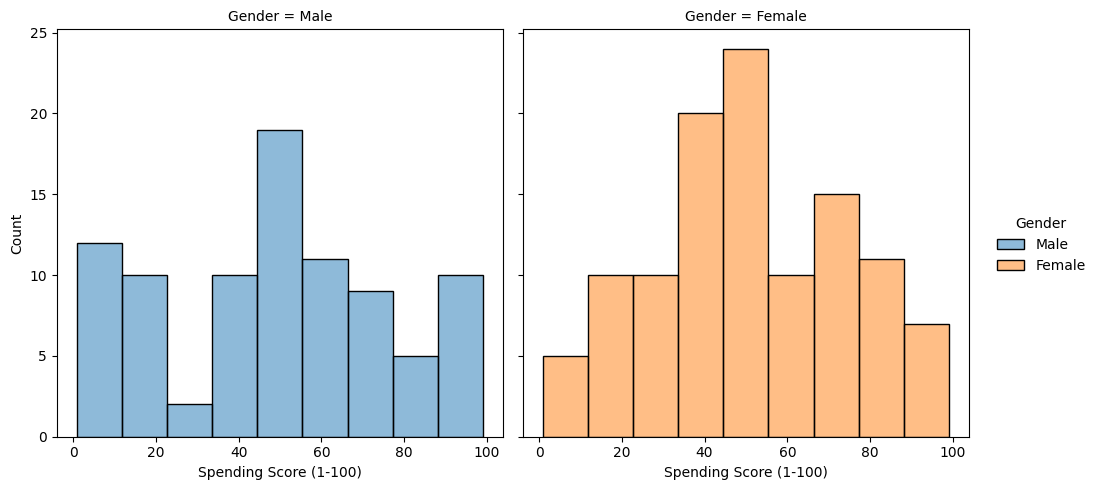

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.displot(data=df, x=i, hue='Gender', col='Gender',facet_kws= {'despine':False})

**FACETGRID**-Only when you put hue= gender and col=gender then you get two graph for a variable i

facet_kws= {'despine':False} this makes box around those histograms, segregate them and make it look better

A kernel density estimate (KDE) plot represents the data using a continuous probability density curve and Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

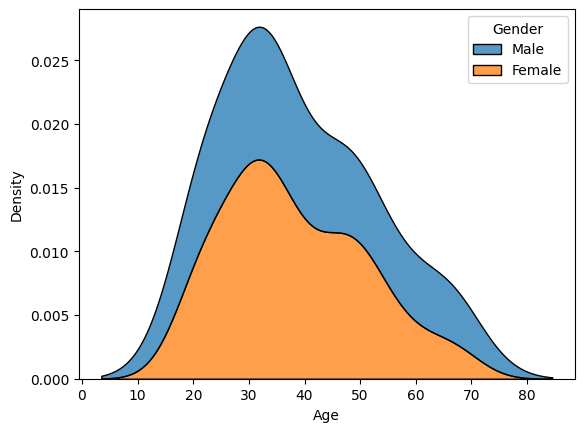

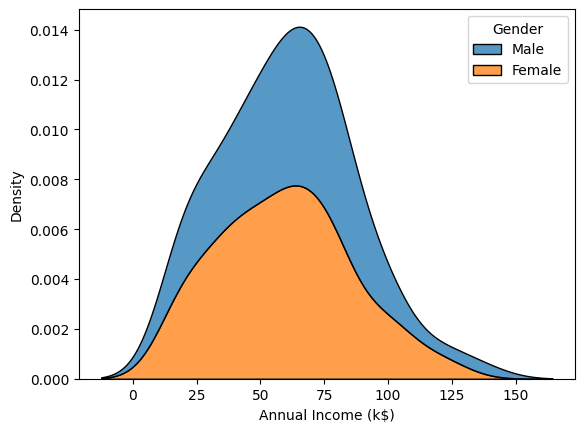

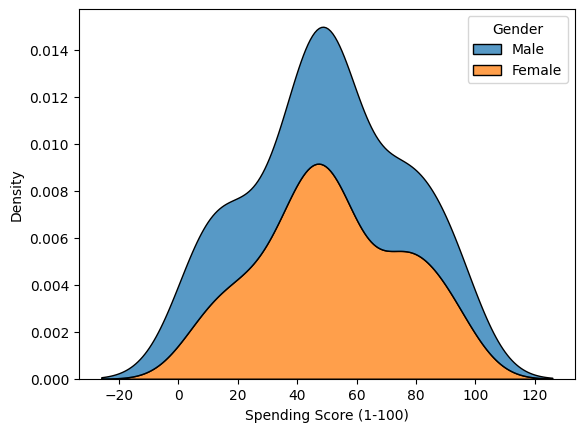

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x=i, hue="Gender", multiple="stack")

<Figure size 640x480 with 0 Axes>

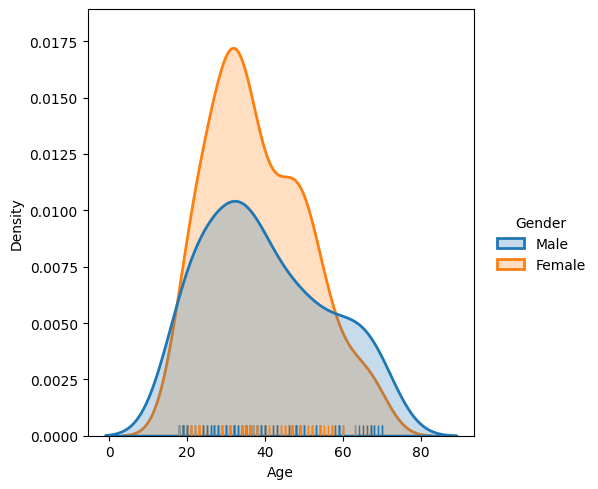

<Figure size 640x480 with 0 Axes>

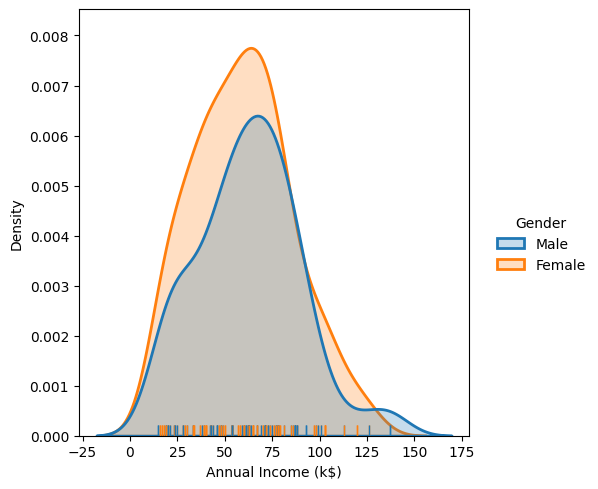

<Figure size 640x480 with 0 Axes>

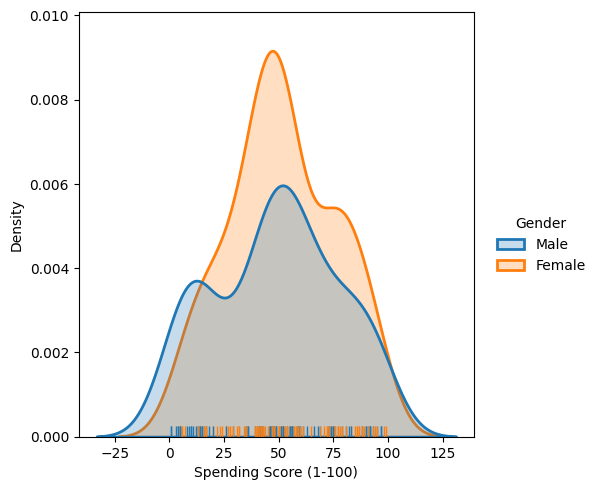

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.displot(data=df, x=i, hue="Gender", kind= "kde", rug= True, fill=True, lw=2, facet_kws= {'despine':False})

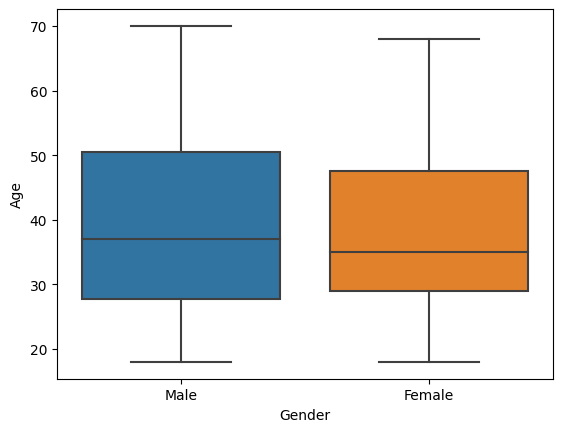

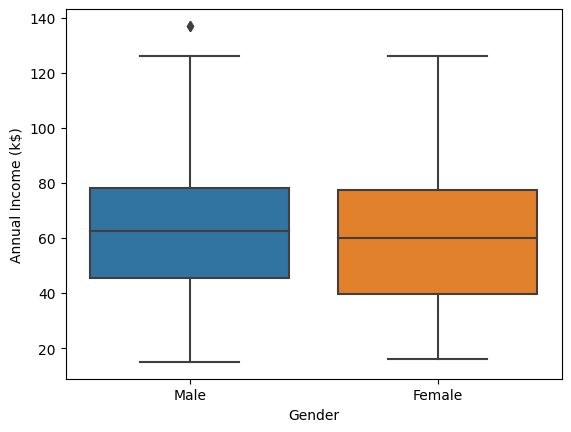

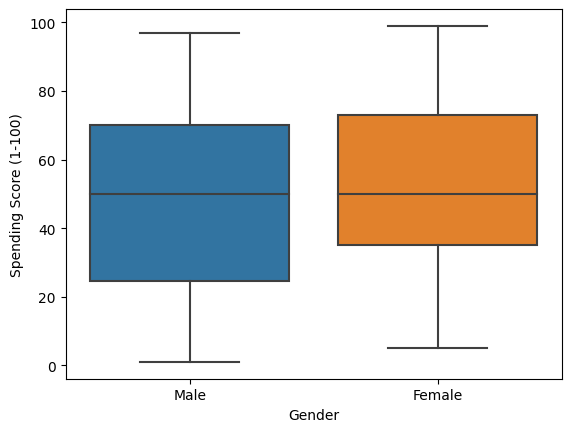

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df, x='Gender', y=i)

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

BIVARIATE ANALYSIS

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

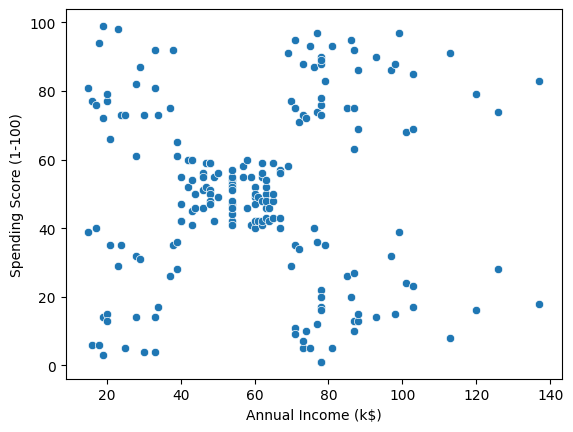

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')

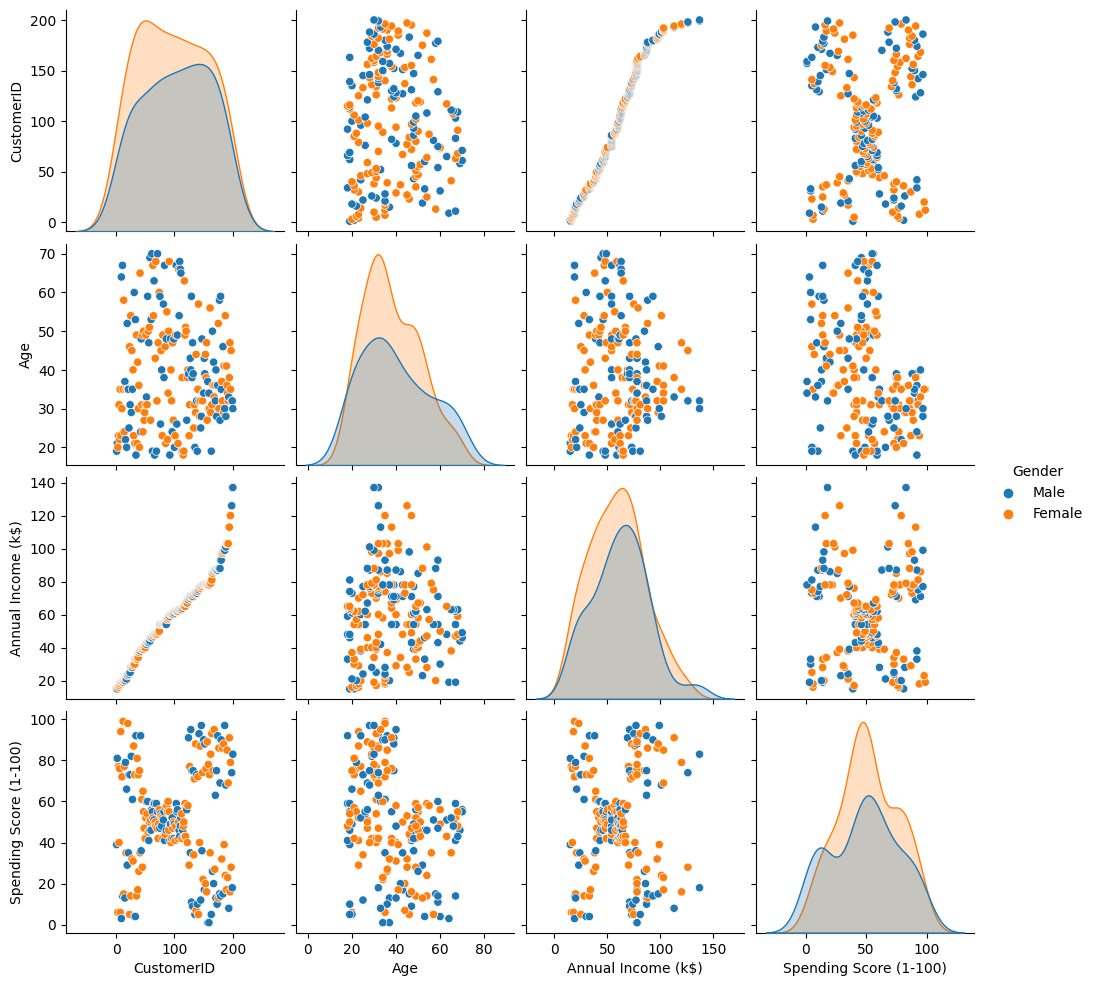

In [ ]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-20-c1b64795595d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<ipython-input-22-407fc1d37529>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

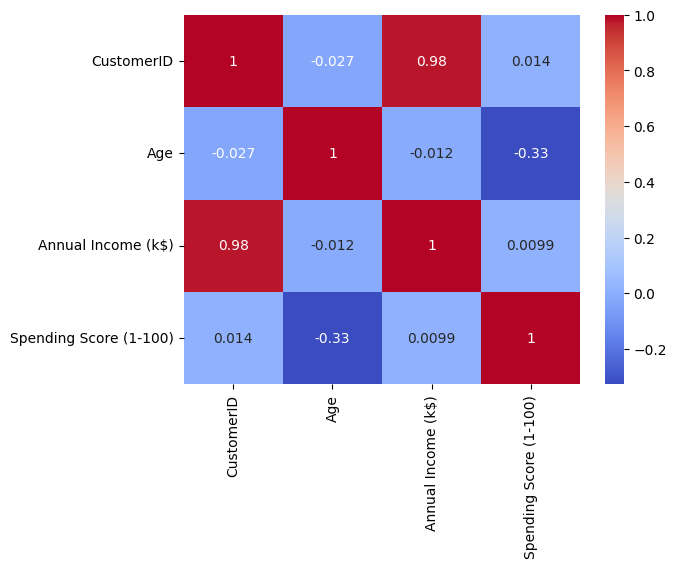

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## **Clustering-Univariate,Bivariate,Multivariate**

In [ ]:
clustering = KMeans(init="k-means++", n_init='auto', n_clusters=3)



In [ ]:
clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3, n_init='auto')

In [ ]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [ ]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [ ]:
clustering.inertia_

23517.33093093093

 Inertia also known as within cluster sum of squares (WCSS), measures the compactness of clusters. It is calculated by summing the squared distances between each data point and its assigned cluster centroid.
 -->Lower inertia means more cohesive clusters
 --> Increasing the no. of clusters, inertia decreases but increase computation time

In [ ]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.28000000006,
 49761.73701298703,
 23517.33093093093,
 13844.222098218703,
 10424.639880952374,
 5134.403624344129,
 4159.401018546673,
 2862.2504273504273,
 2436.2472001682518,
 1844.2775252525253]

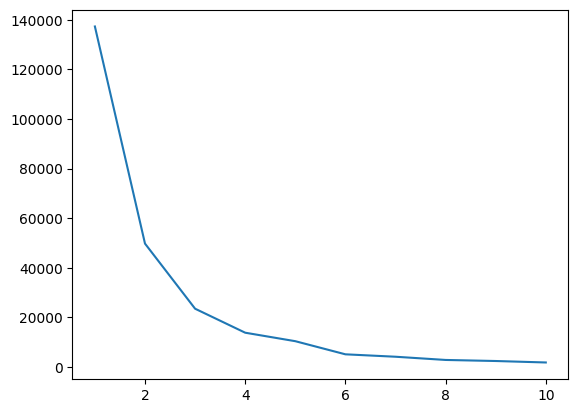

In [ ]:
plt.plot(range(1,11),inertia_scores)

elbow method: elbow starts at 3, so change n_clusters to 3 (you could take any no. initially but then from graph you get the required no. and then run all codes again)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-33-56d0f6fb93a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [ ]:
# Bivariate Clustering

In [ ]:
clustering= KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


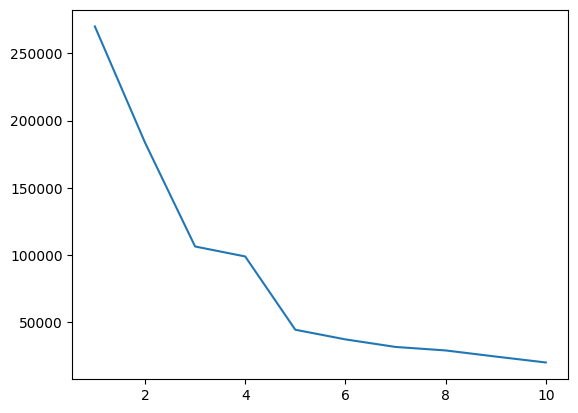

In [ ]:
inertia_scores=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),inertia_scores)

**here elbow shows n_clusters=5**

In [ ]:
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['x', 'y']

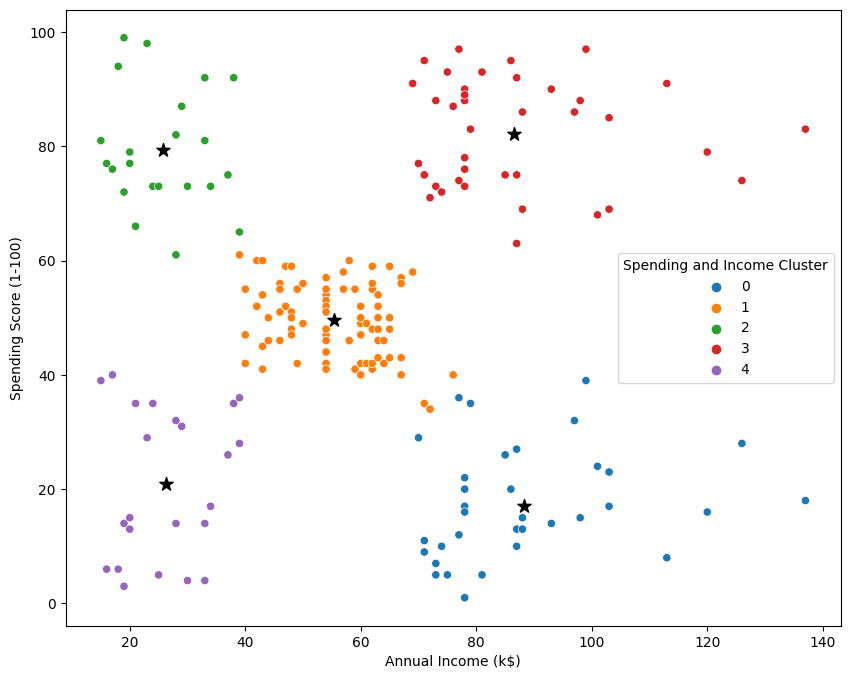

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster', palette="tab10")
plt.savefig('clustering_bivariate.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.590909,0.409091
3,0.538462,0.461538
4,0.608696,0.391304


In [ ]:
df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

<ipython-input-39-f42856ccd92e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending and Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,25.272727,25.727273,79.363636
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [ ]:
#multivariate clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4


In [ ]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,4,0


In [ ]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [ ]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
type(dff)

pandas.core.frame.DataFrame

In [ ]:
from sklearn_pandas import DataFrameMapper

In [ ]:
mapper = DataFrameMapper([(dff.columns,scale())])
scaled_features = mapper.fit_transform(dff.copy(),4)
scaled_features_df = pd.DataFrame(scaled_features, index=dff.index, columns=dff.columns)

In [ ]:
scaled_features_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


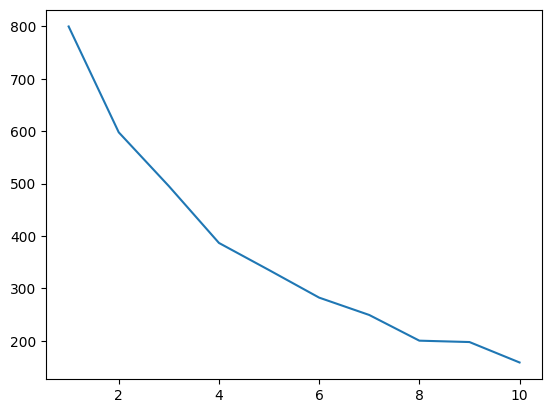

In [ ]:
inertia_scores3=[]
for i in range(1,11):
      kmeans3=KMeans(n_clusters=i, n_init='auto')
      kmeans3.fit(scaled_features_df)
      inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1, 11), inertia_scores3)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,2,3
198,199,Male,32,137,18,2,0


In [ ]:
df.to_csv('Customersegmentation.csv')